In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
df = pd.read_csv("Benchmark_50Hz_5_V3.csv")
display(df)

,acc_x,acc_y,acc_z,vel_x,vel_y,vel_z,ang_acc_roll,ang_acc_pitch,ang_acc_yaw,ang_vel_roll,...,x6,u1_d,u2_d,u3_d,pwm_1,pwm_2,pwm_3,error_h,error_r,error_p
0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,-0.000,-0.0,-0.000
1,5.0,0.0,0.000,0.025,0.0,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,-0.000,-0.0,-0.000
2,5.0,0.0,0.000,0.050,0.0,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,-0.000,-0.0,-0.000
3,5.0,0.0,0.000,0.075,0.0,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,-0.000,-0.0,-0.000
4,5.0,0.0,0.000,0.100,0.0,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,-0.000,-0.0,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,-0.042,4.975,0.0,-0.002,0.0,-0.106,0.0,0.0,...,0.171,0.047,0.047,-0.052,0.0,0.0,0.0,0.003,0.0,-0.005
3996,0.0,0.0,-0.076,4.975,0.0,-0.003,0.0,-0.096,0.0,0.0,...,0.199,0.119,0.120,-0.110,0.0,0.0,0.0,0.003,0.0,-0.006
3997,0.0,0.0,-0.105,4.975,0.0,-0.003,0.0,-0.084,0.0,0.0,...,0.223,0.119,0.120,-0.110,0.0,0.0,0.0,0.003,0.0,-0.007
3998,0.0,0.0,-0.129,4.975,0.0,-0.004,0.0,-0.069,0.0,0.0,...,0.243,0.119,0.120,-0.110,0.0,0.0,0.0,0.003,0.0,-0.008


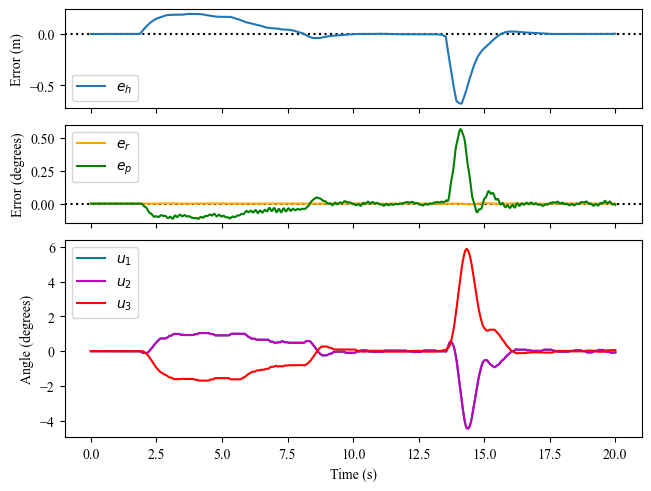

In [39]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default')
plt.rcParams["font.family"] = "Times New Roman"
# Generate dummy data
x = np.linspace(0, 10, 100)  # X-axis values
angle = np.sin(x) * 45  # Angle values in degrees
error = np.cos(x) * 2  # Error values in meters

t = np.linspace(0,len(df),len(df))/200

fig, axs = plt.subplots(3, 1, constrained_layout=True, gridspec_kw={'height_ratios': [1, 1, 2]})
axs[0].axhline(0, color = "black", linestyle='dotted')
axs[0].plot(t, df["error_h"],  label = "$e_{h}$")
axs[0].set_ylabel('Error (m)')
axs[0].legend()
axs[0].legend(loc = 'lower left')

axs[1].axhline(0, color = "black", linestyle='dotted')
axs[1].plot(t, df["error_r"],  label = "$e_{r}$", color = "orange")
axs[1].plot(t, df["error_p"],  label = "$e_{p}$", color = "g")
axs[1].set_ylabel('Error (degrees)')
axs[1].legend()
axs[1].legend(loc = 'upper left')

axs[2].plot(t, df["u1"], label = "$u_{1}$", color = "teal")
axs[2].plot(t, df["u2"], label = "$u_{2}$", color = "m")
axs[2].plot(t, df["u3"], label = "$u_{3}$", color = "r")
axs[2].set_xlabel('Time (s)')
#axs[2].set_title('subplot 2')
axs[2].set_ylabel('Angle (degrees)')
axs[2].legend(loc = 'upper left')

name = "PID Benchmark 50Hz 5 m/s"

name2 = name.replace(" ", "_")
name3 = name2.replace("/", "")
#fig.suptitle(name, fontsize=14)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.savefig(f"{name3}.pdf", format="pdf")
# Share x-axis between subplots
plt.show()
